# ML Project2: IRIS Dataset Prediction Using Logistic Regression




## Import require library

In [ ]:
import pandas as pd
import numpy as np

#Importing  Visualization library
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Model from Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split


## Step1: Data Collection

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print(df.dtypes)
print(df.info())
print(df.shape)
print(df.isnull().sum())
print(df.describe()) #We can check for outliers by looking at the min and max values of each column in relation to the mean.

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(150, 6)
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5

In [ ]:
df_feature=df.iloc[:,[1,2,3,4]]
df_feature

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df_target=df.iloc[:,[5]]
df_target

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


## Step2: Data Cleaning & EDA
1. Look at Data Types
2. Check for Missing Values
3. Statistical Overview
4. *Visualizing*




**Visualizing-Correlations**
The Seaborn library has a great heat map visual for mapping the correlations between features. The higher the number is, the greater the correlation between the two elements. A high positive correlation indicates that the two elements have a positive linear relationship (as one increases the other also increases), and a low negative correlation indicates a negative linear relationship (as one increases the other decreases).

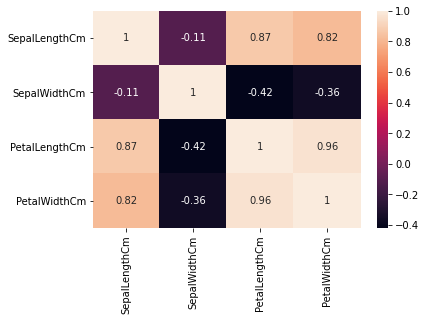

In [ ]:
sns.heatmap(df_feature.corr(), annot = True);

Petal length and width is most correlated with the target, meaning that as these numbers increase, so does the target value. In this case, it means that flowers in class 2 often have longer petal length and width than flowers in class 0. Sepal width is most anti-correlated, indicating that flowers in class 0 have the greatest sepal width than those in class 2. We can also see some intercorrelation between features, for example petal width and length are also highly correlated. This information is not necessarily the best way to analyze the data, but it allows us to start seeing these relationships.

sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

Plot pairwise relationships in a dataset.


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


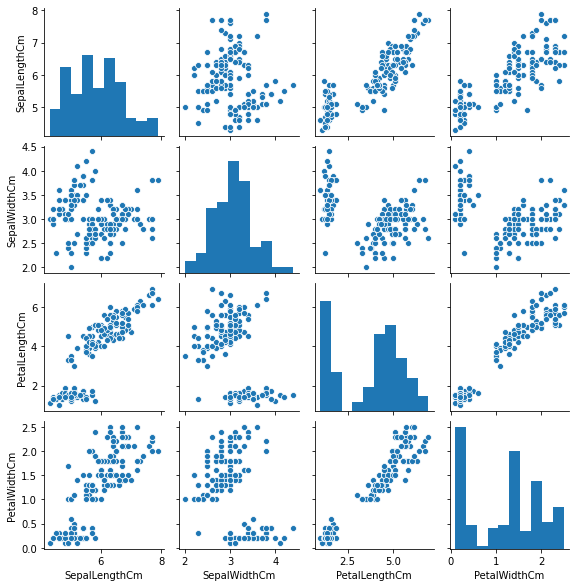

In [ ]:
sns.pairplot(df_feature,size=2,diag_kind='hist')#(data,size=2)#

## Step3: Modeling
After cleaned and explored the data,now begin to develop a model. Our goal is to create a Logistic Regression classification model that will predict which class the flower is based on petal and sepal sizes.

In [ ]:
#create the model instance
dtree_model = DecisionTreeClassifier()
log_model = LogisticRegression()
svm_model = SVC()

## Step4: Training & Test 
Once we separate the features & the target, we can create a train and test class. As the names suggest, we will train our model on the train set, and test the model on the test set. We will randomly select 80% of the data to be in our training, and 20% as test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


**Standardize**
With the X values split between training and test, now we can standardize the values. This puts the numbers on a consistent scale while keeping the proportional relationship between them.

### Step4b: To train the model use model.fit 

In [ ]:
#fit the model on the training data
dtree_model.fit(X_train, y_train)
log_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step5: Evaluate the Model

In [ ]:
#AttributeError: 'LogisticRegression' object has no attribute 'evaluate'

### Step5b: Evaluate the model using Model.score

In [ ]:
#the score, or accuracy of the model
print(dtree_model.score(X_test, y_test))
print(log_model.score(X_test, y_test))
print(svm_model.score(X_test, y_test))

# Output = 0.9666666666666667

0.9666666666666667
0.9666666666666667
0.9666666666666667


### Cross Validation

In [ ]:
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_train, y_train,  cv=10)
print(scores)
print(np.mean(scores))
# Output = 0.966666666666666

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[1.         0.91666667 1.         0.91666667 1.         0.91666667
 1.         1.         0.91666667 1.        ]
0.9666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Without any adjustments or tuning, this model is already performing very well with a test score of .9667 and a cross validation score of .9667. This means that the model is predicting the correct class for the flower about 97% of time. Much higher than the baseline of 33%!


## Step6: Hyper Parameter Tunning
The amount of regularization to apply during learning can be controlled by a hyperparameter.
A hyperparameter is a parameter of a learning algorithm (not of the
model). As such, it is not affected by the learning algorithm itself; it must be set prior
to training and remains constant during training. If you set the regularization hyperparameter
to a very large value, you will get an almost flat model (a slope close to
zero); the learning algorithm will almost certainly not overfit the training data, but it
will be less likely to find a good solution. Tuning hyperparameters is an important
part of building a Machine Learning system (you will see a detailed example in the
next chapter).

## Step7: Model Predictions

In [ ]:
predictions = log_model.predict(X_test)
predictions
print("autual",y_test)

autual              Species
14       Iris-setosa
98   Iris-versicolor
75   Iris-versicolor
16       Iris-setosa
131   Iris-virginica
56   Iris-versicolor
141   Iris-virginica
44       Iris-setosa
29       Iris-setosa
120   Iris-virginica
94   Iris-versicolor
5        Iris-setosa
102   Iris-virginica
51   Iris-versicolor
78   Iris-versicolor
42       Iris-setosa
92   Iris-versicolor
66   Iris-versicolor
31       Iris-setosa
35       Iris-setosa
90   Iris-versicolor
84   Iris-versicolor
77   Iris-versicolor
40       Iris-setosa
125   Iris-virginica
99   Iris-versicolor
33       Iris-setosa
19       Iris-setosa
73   Iris-versicolor
146   Iris-virginica


In [ ]:
#Save the Model
import pickle
pickle.dump(dtree_model,open('dtree_model.pk','wb'))
pickle.dump(log_model,open('log_model.pk','wb'))
pickle.dump(svm_model,open('svm_model.pk','wb'))

In [ ]:
pre=pickle.load(open('svm_model.pk','rb'))
res = pre.score(X_test, y_test)
print(res)

0.9666666666666667


In [ ]:
df_new_data= pd.read_excel("/content/drive/My Drive/iris pre.xlsx")
new_data=df_new_data.iloc[:,[1,2,3,4]]
print(new_data.shape)
new_data

(8, 4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.8,1.6,0.2
1,4.6,3.2,1.4,0.2
2,5.3,3.7,1.5,0.2
3,5.0,3.3,1.4,0.2
4,7.0,3.2,4.7,1.4
5,6.4,3.2,4.5,1.5
6,6.9,3.1,4.9,1.5
7,5.5,2.3,4.0,1.3


In [ ]:
predictions_new = log_model.predict(new_data)
predictions_new

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [ ]:
prediction_in_frame=pd.DataFrame(predictions_new)
resuls=new_data.join(prediction_in_frame.rename(columns={0:"prediction"}))
resuls

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,prediction
0,5.1,3.8,1.6,0.2,Iris-setosa
1,4.6,3.2,1.4,0.2,Iris-setosa
2,5.3,3.7,1.5,0.2,Iris-setosa
3,5.0,3.3,1.4,0.2,Iris-setosa
4,7.0,3.2,4.7,1.4,Iris-versicolor
5,6.4,3.2,4.5,1.5,Iris-versicolor
6,6.9,3.1,4.9,1.5,Iris-versicolor
7,5.5,2.3,4.0,1.3,Iris-versicolor


## Confusion Matrix
To look more closely at the predictions that the model made, we can use the confusion matrix. In the confusion matrix, the predicted values are the columns and the actual are the rows. It allows us to see where the model makes true and false predictions, and if it predicts incorrectly, we can see which class it is predicting falsely.


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


## Classification Report
Another good way to check how your model is performing is by looking at the classification report. It shows the precision, recall, f1 scores, and accuracy scores, and below is a very brief explanation of these features.
Precision: Number of correctly predicted Iris Virginica flowers (10) out of total number of predicted Iris Virginica flowers (10). Precision in predicting Iris Virginica =10/10 = 1.0
Recall: Number of correctly predicted Iris Virginica out of the number of actual Iris Virginica. Recall = 9/10 = .9
F1 Score: This is a harmonic mean of precision and recall. The formula is F1 Score = 2* (precision * recall) / (precision + recall)
Accuracy: Add all the correct predictions together for all classes and divide by the total number of predictions. 29 correct predictions /30 total values = accuracy of .9667.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Predicted Probabilities
we can look at the probabilities of each row of data being assigned to one of the three classes. By default, the model will assign the item to the class with the highest probability. If we wanted to adjust the accuracy or precision, we could do this by changing the threshold of how high the predicted probability would have to be before it was assigned to that class.
In this case, there is not a consequence to incorrectly assigning a flower to another class, but models used to detect cancer cells adjust their models to ‘assume the worst’ and assign it as a true cancer cell more often. This is used in many cases when it is better to be over cautious than mislabel the cell as safe and healthy.


In [ ]:
probs = log_model.predict_proba(X_test)
#put the probabilities into a dataframe for easier viewing
Y_pp = pd.DataFrame(probs, columns=['class_0_pp', 'class_1_pp', 'class_2_pp'])
Y_pp.head(3)

,class_0_pp,class_1_pp,class_2_pp
0,0.984838,0.015162,2.152236e-08
1,0.277749,0.719609,2.642139e-03
2,0.006205,0.889278,1.045176e-01
